<a href="https://colab.research.google.com/github/johnowusuduah/portfolio/blob/main/f_logistic_regression_modeling_smoking_premature_babies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression Modeling of Associative Relationship Between Chances of Giving Birth to Premature Babies and Smoking Habits of Mothers in R

## Introduction

Fifty years ago it was not trite knowledge that pregnant women could expose their unborn children to untold harm by smoking. The Child Health and Development Studies carried out a thorough study of babies born at the Kaiser Foundational Hospital in Oakland, California between 1960 and 1967. The smoking habits, along with socioeconomic, biographic and demographic conditions of the respondents were recorded and collated in a data set, which is the source of our statistical analysis. 

We would like to determine if there is association between odds of giving birth to premature babies and maternal smoking behavior. We would also like to find out the likely range for the odds ratio of pre-term birth for mothers who smoke versus mothers who do not smoke. Thirdly, we would also investigate if race significantly affects the association between smoking and odds of giving birth to premature babies.And finally, we will explore other interesting associations with the odds of pre-term birth that are note worthy.



## Code Book
a.gestation - length of gestation in days\
b.parity - total number of previous pregnancies, including fetal deaths and still births.\
mrace - mother's race or ethnicity (0-5=white, 6=mexican, 7=black, 8=asian, 9=mix)\
c.mage - mother's age in years at termination of pregnancy\
d.med - mother's education\
 (\
0=less than 8th grade\
1=8th to 12th grade. did not graduate high school\
2=high school graduate, no other schooling\
3=high school graduate + trade school\
4=high school graduate + some college\
5=college graduate\
6,7=trade school but unclear if graduated from high school\
 )\
e.mpregwt - mother' pre-pregnancy weight in pounds\
f.mht - mother's height in inches\
g.smoke - does mother smoke?(0=never, 1=smokes now, 2=until preg, 3=once did, not now




## Exploratory Data Analysis (EDA)

Our data set was the clean version of the original data set called "smoking.csv". Our response variable, which is the gestational period of babies was converted into a binary categorical variable with 270 days being the critical threshold, before a logistic regression analysis was carried out. The continuous predictor variables in data set were centered from the get-go to preemptively handle multicollinearity which logistic regression models are sensitive to. 

Load necessary packages

In [45]:
library(ggplot2)
library(MASS)

In [46]:
babies <- read.csv("https://raw.githubusercontent.com/johnowusuduah/portfolio/main/smoking.csv", stringsAsFactor = FALSE, header = TRUE)
babies$mrace[(babies$mrace >= 0) & (babies$mrace <= 5)] <- 0
babies$gestation[(babies$gestation < 270)] <- 1
babies$gestation[(babies$gestation >= 270)] <- 0
babies$med[(babies$med == 7)] <- 6
babies$mrace <- factor(babies$mrace)
babies$gestation <- factor(babies$gestation)
babies$med <- factor(babies$med)
babies$inc <- factor(babies$inc)
babies$smoke <- factor(babies$smoke)
babies$gestation_condition <- factor(babies$gestation, levels=c(0,1),labels=c("Not Preterm","Preterm"))
babies$mage_c <- c(scale(babies$mage, scale=F))
babies$mht_c <- c(scale(babies$mht, scale=F))
babies$mpregwt_c <- c(scale(babies$mpregwt, scale=F))
#table(babies$parity)
str(babies)

'data.frame':	869 obs. of  16 variables:
 $ id                 : int  4604 7435 7722 2026 3553 3491 6757 6153 8187 8403 ...
 $ date               : int  1598 1527 1563 1503 1638 1705 1444 1405 1669 1669 ...
 $ gestation          : Factor w/ 2 levels "0","1": 2 2 2 2 2 2 2 2 2 2 ...
 $ bwt.oz             : int  116 110 55 132 105 85 97 129 63 128 ...
 $ parity             : int  7 7 11 4 4 7 0 3 0 0 ...
 $ mrace              : Factor w/ 5 levels "0","6","7","8",..: 3 3 3 3 3 3 2 3 1 3 ...
 $ mage               : int  28 27 35 28 34 33 26 24 24 17 ...
 $ med                : Factor w/ 7 levels "0","1","2","3",..: 2 2 4 3 4 2 6 5 6 2 ...
 $ mht                : int  66 64 65 67 61 67 65 66 58 64 ...
 $ mpregwt            : int  135 133 140 148 130 130 112 135 99 126 ...
 $ inc                : Factor w/ 10 levels "0","1","2","3",..: 3 2 7 4 4 3 7 2 8 3 ...
 $ smoke              : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ gestation_condition: Factor w/ 2 levels "Not Preterm",.

First, we checked for empty or missing values in the data frame and we saw that there were no empty or missing values in the data frame.

In [47]:
colSums(is.na(babies))

id                date           gestation              bwt.oz 
                  0                   0                   0                   0 
             parity               mrace                mage                 med 
                  0                   0                   0                   0 
                mht             mpregwt                 inc               smoke 
                  0                   0                   0                   0 
gestation_condition              mage_c               mht_c           mpregwt_c 
                  0                   0                   0                   0

We plotted box plots for the continuous predictor variables in our data set against our response variable to gain intuition about the relationships.

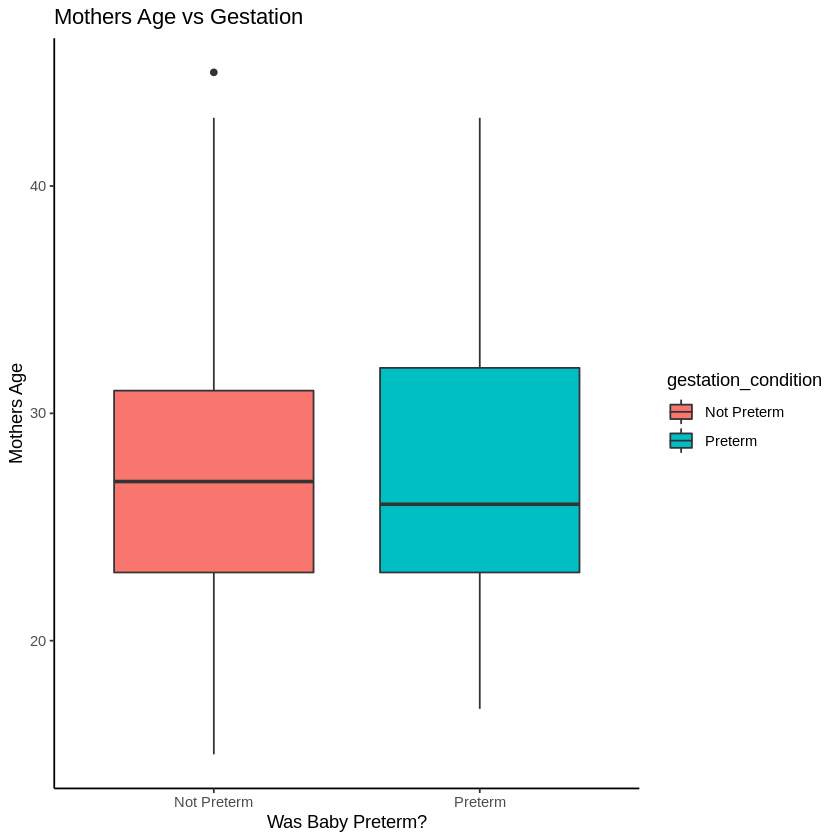

In [48]:
ggplot(babies,aes(x=gestation_condition, y=mage, fill=gestation_condition)) + geom_boxplot() + labs(title="Mothers Age vs Gestation", x="Was Baby Preterm?", y="Mothers Age") + theme_classic()

We noticed that there is little difference in the distribution of mothers age for both preterm and non-preterm babies. The median age of mothers who gave birth to preterm babies was lower than the median age of mothers who gave birth to full term babies.

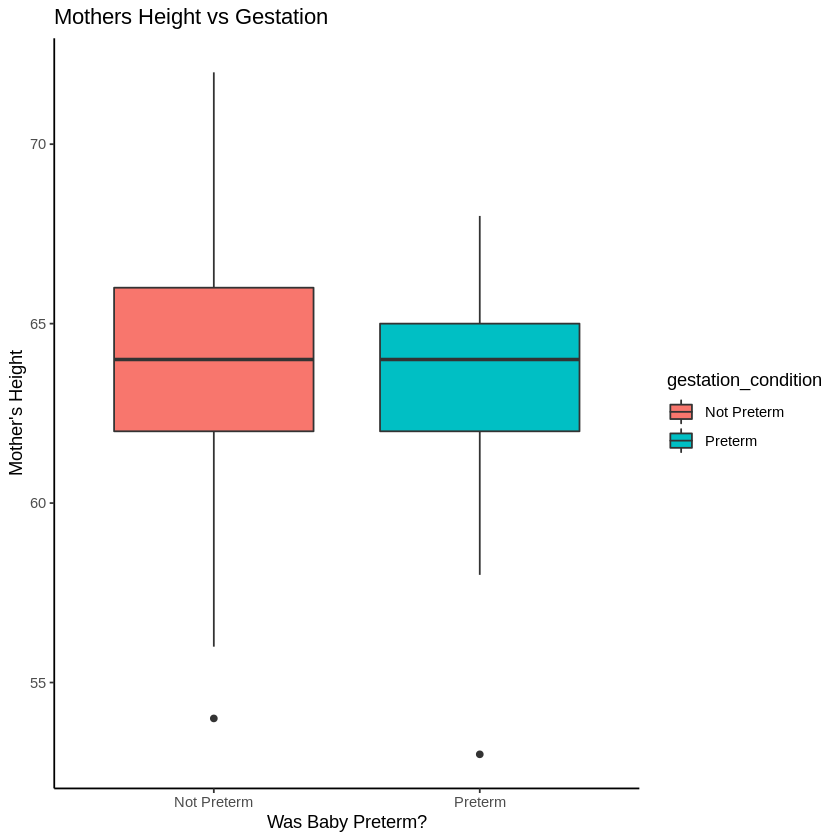

In [49]:
ggplot(babies,aes(x=gestation_condition, y=mht, fill=gestation_condition)) + geom_boxplot() + labs(title="Mothers Height vs Gestation", x="Was Baby Preterm?", y="Mother's Height") + theme_classic()

Although the median height of mothers who girth to both premature and full term babies were approximately the same, the distribution of ages was wider for mothers who gave birth to full term babies.No associative pattern was observed.

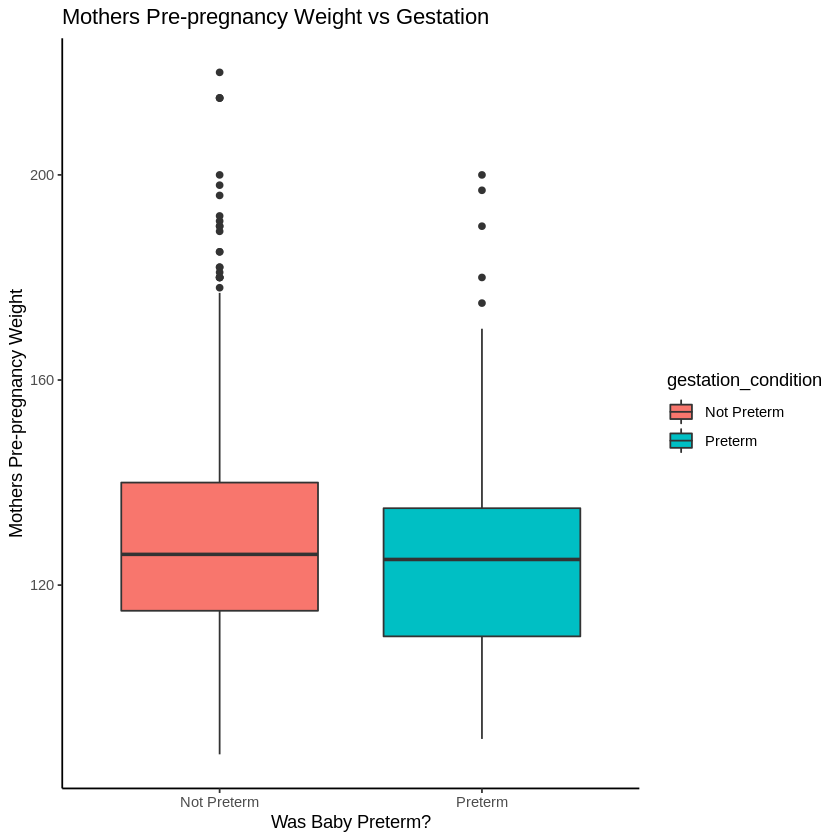

In [50]:
ggplot(babies,aes(x=gestation_condition, y=mpregwt, fill=gestation_condition)) + geom_boxplot() + labs(title="Mothers Pre-pregnancy Weight vs Gestation", x="Was Baby Preterm?", y="Mothers Pre-pregnancy Weight") + theme_classic()

Even though the distribution of pre-pregnancy weights of mothers of premature and full term babies are identical, the median pre-pregnancy weight of mothers who gave birth to preterm babies is lower than the pre-pregnancy weight of mothers who give birth to full term babies.

For categorical predictor variables, we explored joint conditional probabilities with the response variable and also carried out a Chi-squared test to determine if the two categorical variables were dependent.

In [51]:
tapply(babies$gestation_condition, babies$smoke, function(x) table(x)/sum(table(x)))
chisq.test(table(babies[,c("gestation_condition","smoke")]))

$`0`
x
Not Preterm     Preterm 
  0.8347639   0.1652361 

$`1`
x
Not Preterm     Preterm 
  0.7841191   0.2158809 



	Pearson's Chi-squared test with Yates' continuity correction

data:  table(babies[, c("gestation_condition", "smoke")])
X-squared = 3.2971, df = 1, p-value = 0.0694


For the smoke predictor variable, we noticed that the probability of giving birth to premature babies was higher (ie.22%) for smokers than the probability of giving birth to premature babies (ie.17%) for non-smokers. However, the Chi-squared test yielded a p-value of 0.0694 which meant that the two categorical variables were independent. Nevertheless, because the inferential questions we need to answer were centered around the smoking habits of mothers, we included it in our model.

In [52]:
table(babies[,c("gestation_condition","parity")])

                   parity
gestation_condition   0   1   2   3   4   5   6   7   8   9  10  11
        Not Preterm 173 175 141 101  46  36  18   8   3   4   0   0
        Preterm      36  45  32  19  15   4   4   4   0   1   2   2

The total number of previous pregnancies (ie.parity) is a discrete variable and to have an idea of the distribution its values, it would be better to use contingency table rather than a box plot.The contingency revealed lack of data for total number of previous pregnancies, including fetal deaths and still births that were larger than 4. If left unfixed, this would have produced binned residual plots that would be difficult to interpret. To solve this, parity was collapsed into five (5) categories of approximate equal number of observations. We placed mothers who had four or more previous pregnancies into a category labeled 4, all the while making no changes to the other factors.

In [53]:
babies$parity[(babies$parity > 3)] <- 4
babies$parity <- factor(babies$parity)
table(babies[,c("gestation_condition","parity")])

                   parity
gestation_condition   0   1   2   3   4
        Not Preterm 173 175 141 101 115
        Preterm      36  45  32  19  32

After, we fixed the issue, we then checked the conditional probability matrix and carried out the Chi-squared test.

In [54]:
tapply(babies$gestation_condition, babies$parity, function(x) table(x)/sum(table(x)))
chisq.test(table(babies[,c("gestation_condition","parity")]))

$`0`
x
Not Preterm     Preterm 
  0.8277512   0.1722488 

$`1`
x
Not Preterm     Preterm 
  0.7954545   0.2045455 

$`2`
x
Not Preterm     Preterm 
  0.8150289   0.1849711 

$`3`
x
Not Preterm     Preterm 
  0.8416667   0.1583333 

$`4`
x
Not Preterm     Preterm 
  0.7823129   0.2176871 



	Pearson's Chi-squared test

data:  table(babies[, c("gestation_condition", "parity")])
X-squared = 2.2754, df = 4, p-value = 0.6853


The p-value of a Chi-squared test between gestation and total number of previous pregnancies revealed independence. Thus, parity was not considered when carrying out model building.

In [55]:
tapply(babies$gestation_condition, babies$mrace, function(x) table(x)/sum(table(x)))
chisq.test(table(babies[,c("gestation_condition","mrace")]))

$`0`
x
Not Preterm     Preterm 
  0.8386581   0.1613419 

$`6`
x
Not Preterm     Preterm 
       0.76        0.24 

$`7`
x
Not Preterm     Preterm 
  0.7337278   0.2662722 

$`8`
x
Not Preterm     Preterm 
  0.6764706   0.3235294 

$`9`
x
Not Preterm     Preterm 
 0.93333333  0.06666667 


Warning message in chisq.test(table(babies[, c("gestation_condition", "mrace")])):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  table(babies[, c("gestation_condition", "mrace")])
X-squared = 15.628, df = 4, p-value = 0.003561


The Chi-squared test between gestation and mother's race revealed that the two variables were dependent. So we included mother's race in our model

We then explored the relationship mother's education (med) as a predictor variable.

In [56]:
tapply(babies$gestation_condition, babies$med, function(x) table(x)/sum(table(x)))
chisq.test(table(babies[,c("gestation_condition","med")]))

$`0`
x
Not Preterm     Preterm 
        0.6         0.4 

$`1`
x
Not Preterm     Preterm 
  0.7230769   0.2769231 

$`2`
x
Not Preterm     Preterm 
  0.8099688   0.1900312 

$`3`
x
Not Preterm     Preterm 
  0.7659574   0.2340426 

$`4`
x
Not Preterm     Preterm 
  0.8817734   0.1182266 

$`5`
x
Not Preterm     Preterm 
  0.8301887   0.1698113 

$`6`
x
Not Preterm     Preterm 
       0.25        0.75 


Warning message in chisq.test(table(babies[, c("gestation_condition", "med")])):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  table(babies[, c("gestation_condition", "med")])
X-squared = 23.888, df = 6, p-value = 0.0005476


The conditional probability matrix of mothers education revealed a telling trend. That is, the higher the educational level of a mother, the lower the probability that she would give birth to a preterm baby. Also, the p-value showed that these two variables are dependent on some level

We explored whether interaction between mother's pre-pregnancy weight and smoking habits had an associative effect on the chances of mothers giving birth to preterm babies.

In [57]:
table(babies[,c("gestation_condition", "smoke", "med")])
table(babies[,c("gestation_condition", "smoke", "med")])/sum(table(babies[,c("gestation_condition", "smoke", "med")]))
apply(table(babies[,c("gestation_condition", "smoke", "med")])/sum(table(babies[,c("gestation_condition", "smoke", "med")])),3, function(x) x/sum(x))

, , med = 0

                   smoke
gestation_condition   0   1
        Not Preterm   3   0
        Preterm       0   2

, , med = 1

                   smoke
gestation_condition   0   1
        Not Preterm  34  60
        Preterm      15  21

, , med = 2

                   smoke
gestation_condition   0   1
        Not Preterm 145 115
        Preterm      26  35

, , med = 3

                   smoke
gestation_condition   0   1
        Not Preterm  12  24
        Preterm       7   4

, , med = 4

                   smoke
gestation_condition   0   1
        Not Preterm 111  68
        Preterm      11  13

, , med = 5

                   smoke
gestation_condition   0   1
        Not Preterm  83  49
        Preterm      16  11

, , med = 6

                   smoke
gestation_condition   0   1
        Not Preterm   1   0
        Preterm       2   1


, , med = 0

                   smoke
gestation_condition           0           1
        Not Preterm 0.003452244 0.000000000
        Preterm     0.000000000 0.002301496

, , med = 1

                   smoke
gestation_condition           0           1
        Not Preterm 0.039125432 0.069044879
        Preterm     0.017261220 0.024165708

, , med = 2

                   smoke
gestation_condition           0           1
        Not Preterm 0.166858458 0.132336018
        Preterm     0.029919448 0.040276180

, , med = 3

                   smoke
gestation_condition           0           1
        Not Preterm 0.013808976 0.027617952
        Preterm     0.008055236 0.004602992

, , med = 4

                   smoke
gestation_condition           0           1
        Not Preterm 0.127733026 0.078250863
        Preterm     0.012658228 0.014959724

, , med = 5

                   smoke
gestation_condition           0           1
        Not Preterm 0.095512083 0.056386651
        Preterm    

0,1,2,3,4,5,6
0.6,0.2615385,0.45171340,0.25531915,0.54679803,0.52201258,0.25
0.0,0.1153846,0.08099688,0.14893617,0.05418719,0.10062893,0.50
0.0,0.4615385,0.35825545,0.51063830,0.33497537,0.30817610,0.00
0.4,0.1615385,0.10903427,0.08510638,0.06403941,0.06918239,0.25


We observed some noticeable interaction between mothers pre-pregnancy weight and smoking habits so we included the interaction in our baseline model.

At the end of EDA, we identified the following predictor variables as being likely to have some associative relationship with whether a baby would be born premature or full term; mothers pre-pregnancy weight(mpregwt), smoking habits of mothers(smoke), mothers race(mrace) and mothers education(med).

## Model

### Model Fitting (Baseline Model)
We first built a baseline model with the predictor variables we identified from our EDA.

In [58]:
baseline_model <- glm(gestation ~ smoke + mpregwt_c + mrace + med + mpregwt_c:smoke, family=binomial(link=logit),data=babies)


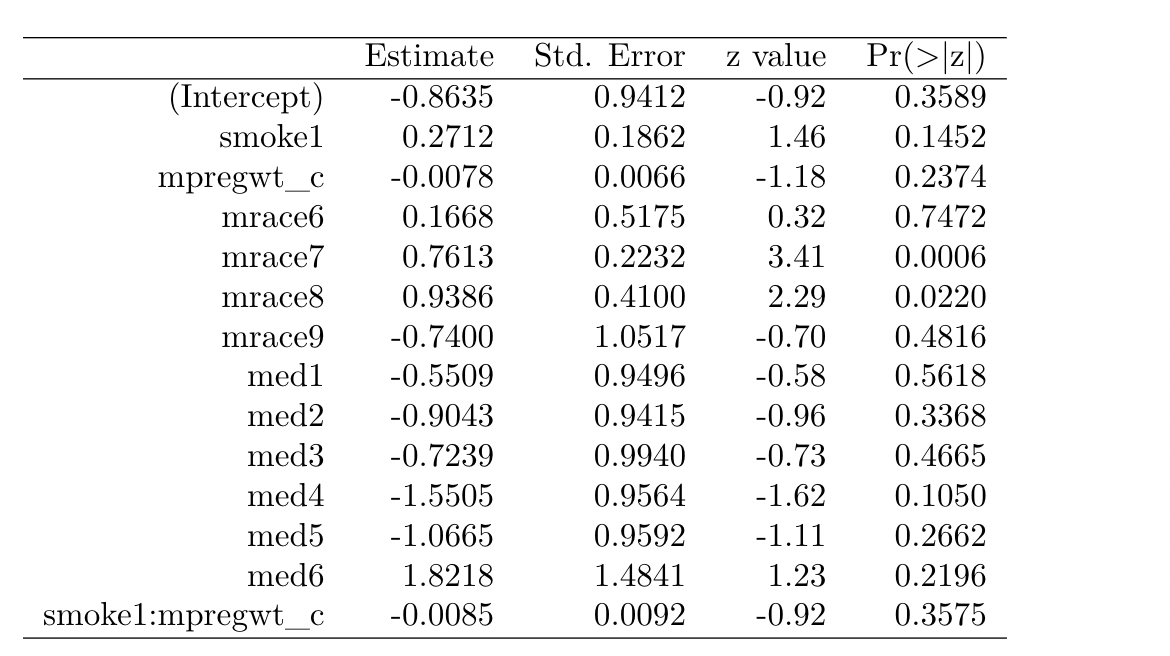

The equation of the baseline model is as follows:

$y_{i}|x_{i} ~ Bernoulli(\pi_{i}); log(\frac{\pi_{i}}{1-\pi_{i}}) = \beta _{0} + \beta _{1}x_{i1}(mpregwt)+ \beta _{2j}x_{i2}(mrace)+ \beta _{3j}x_{i3}(med)+ \beta _{4j}x_{i4}(smoke)+\beta _{4j}x_{i1}x_{i4}(mpregwt:smoke)$

where $\pi_{i}$ is the odds of giving birth to a premature baby



### Model Diagnostics (Baseline Model)

In diagnosing our baseline model, we first made binned residual plots vs the fitted values of the entire baseline model. The points appeared randomly distributed and all but one observation was outside the 95% confidence interval. 

rawresid1 <- residuals(baseline_model,"resp")\
binnedplot(x=fitted(baseline_model), y=rawresid1, xlab="Pred. probabilities", col.int = "red4", ylab="Avg. residuals", main="Binned Residual Plot of Baseline Model", col.pts="navy")

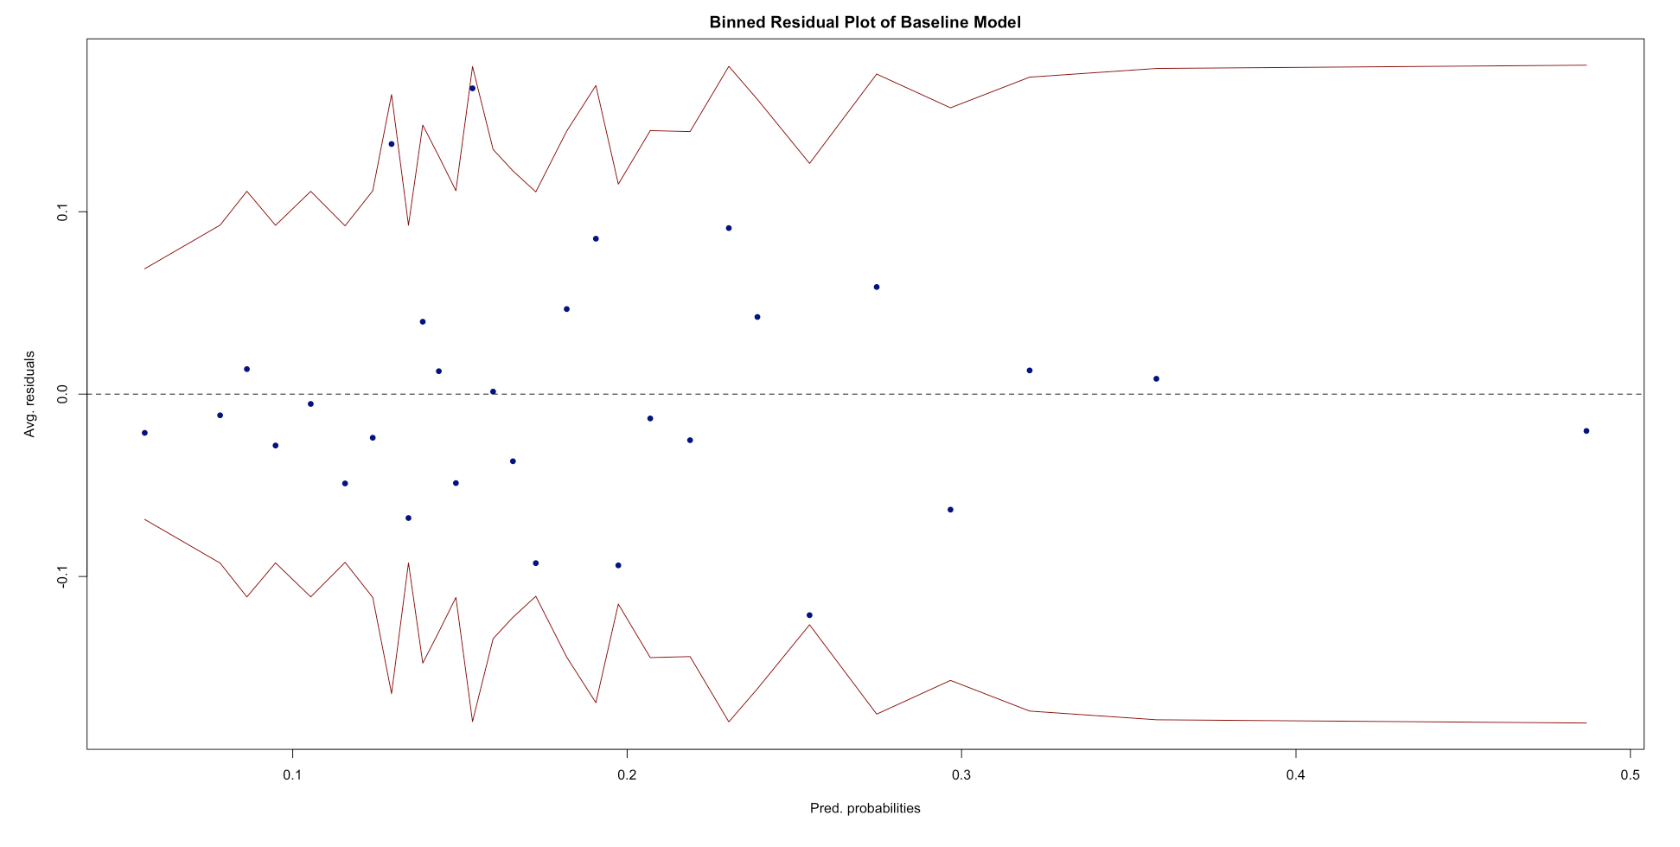

We also made binned plots of average residuals versus our only continuous predictor variable of mothers pre-pregnancy weight. There was randomness in the points and all but two observations were located in the 95% confidence interval. These two observations were too close to the the 95% confidence interval to be considered outliers.


binnedplot(x=babies$mpregwt_c, y=rawresid1, xlab="Mothers Pre-pregnancy Weight Centered", col.int = "red4", ylab="Avg. residuals", main="Binned Residual Plot of Mothers Pre-pregnancy Weight", col.pts="navy")

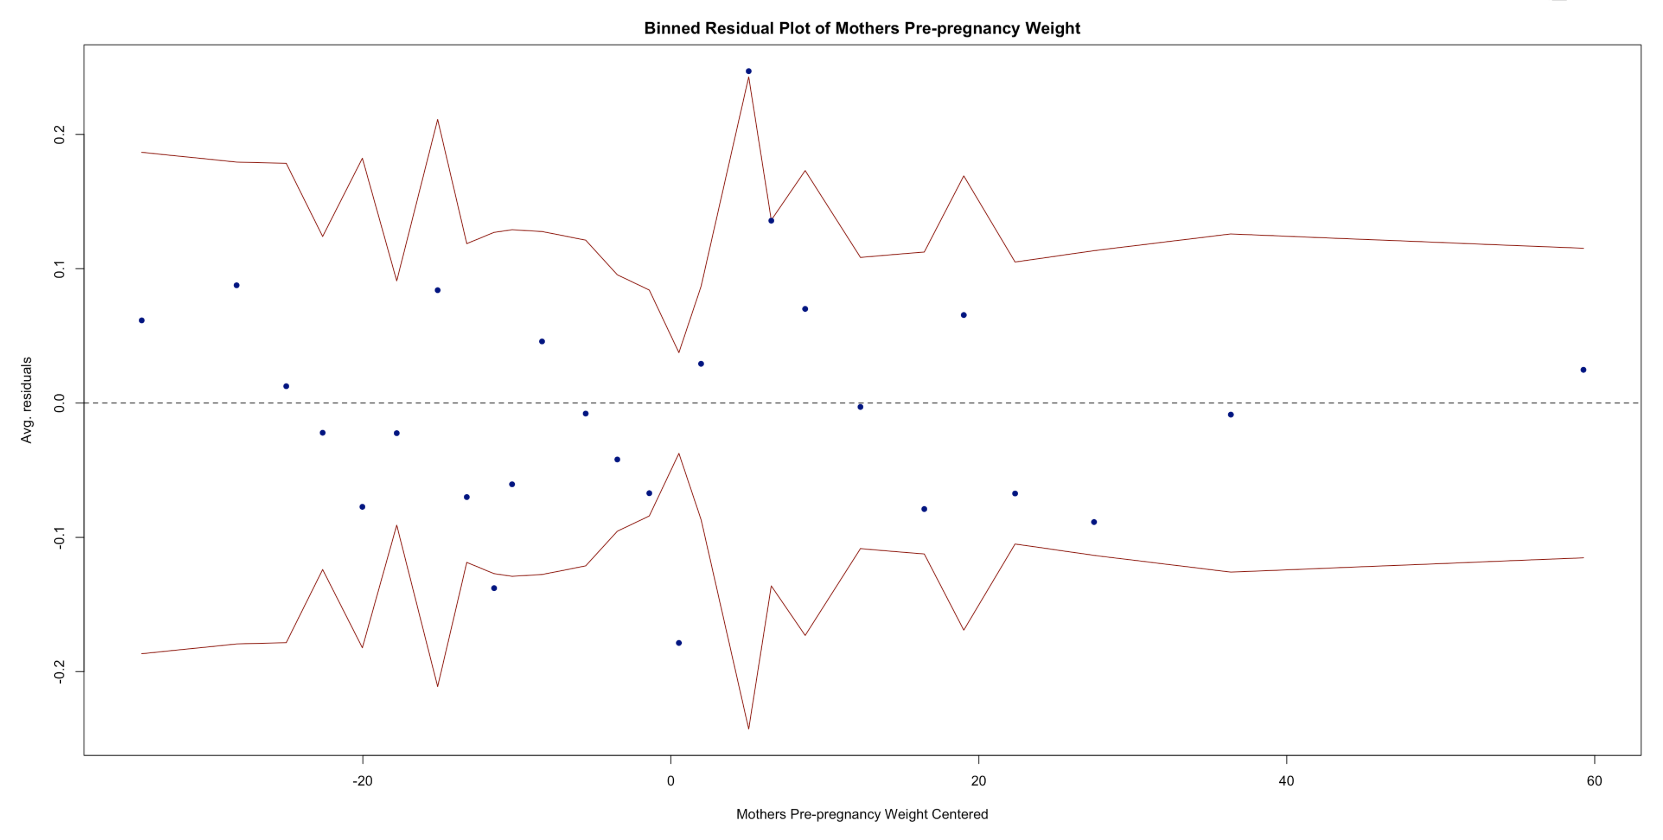

### Model Validation (Baseline Model)

We validated our baseline model initially with a threshold probability of 0.5. Logistic regression models that can be relied upon to make good predictions have high sensitivity (ie.how well the model is predicting positive results), high specificity (ie.how well the model is predicting negative results) and AUC close to 1. With a sensitivity value of 0.02, our baseline model did not perform well when predicting the chances of mothers giving birth to premature babies. On the other hand with a specificity of 0.99, our baseline model performed well when predicting the chances of mothers giving birth to full-term babies.

*conf_mat <- confusionMatrix(as.factor(ifelse(fitted(baseline_model) > 0.5, "1","0")), as.factor(babies$gestation),positive="1")*

*conf_mat$table*

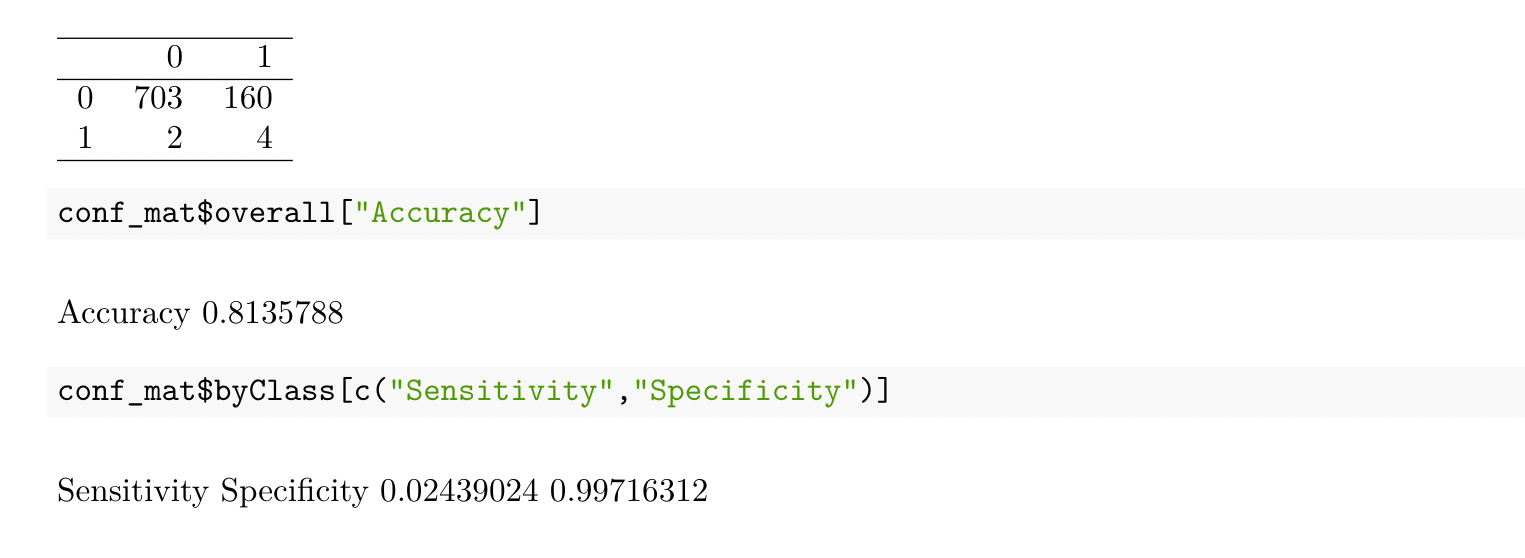

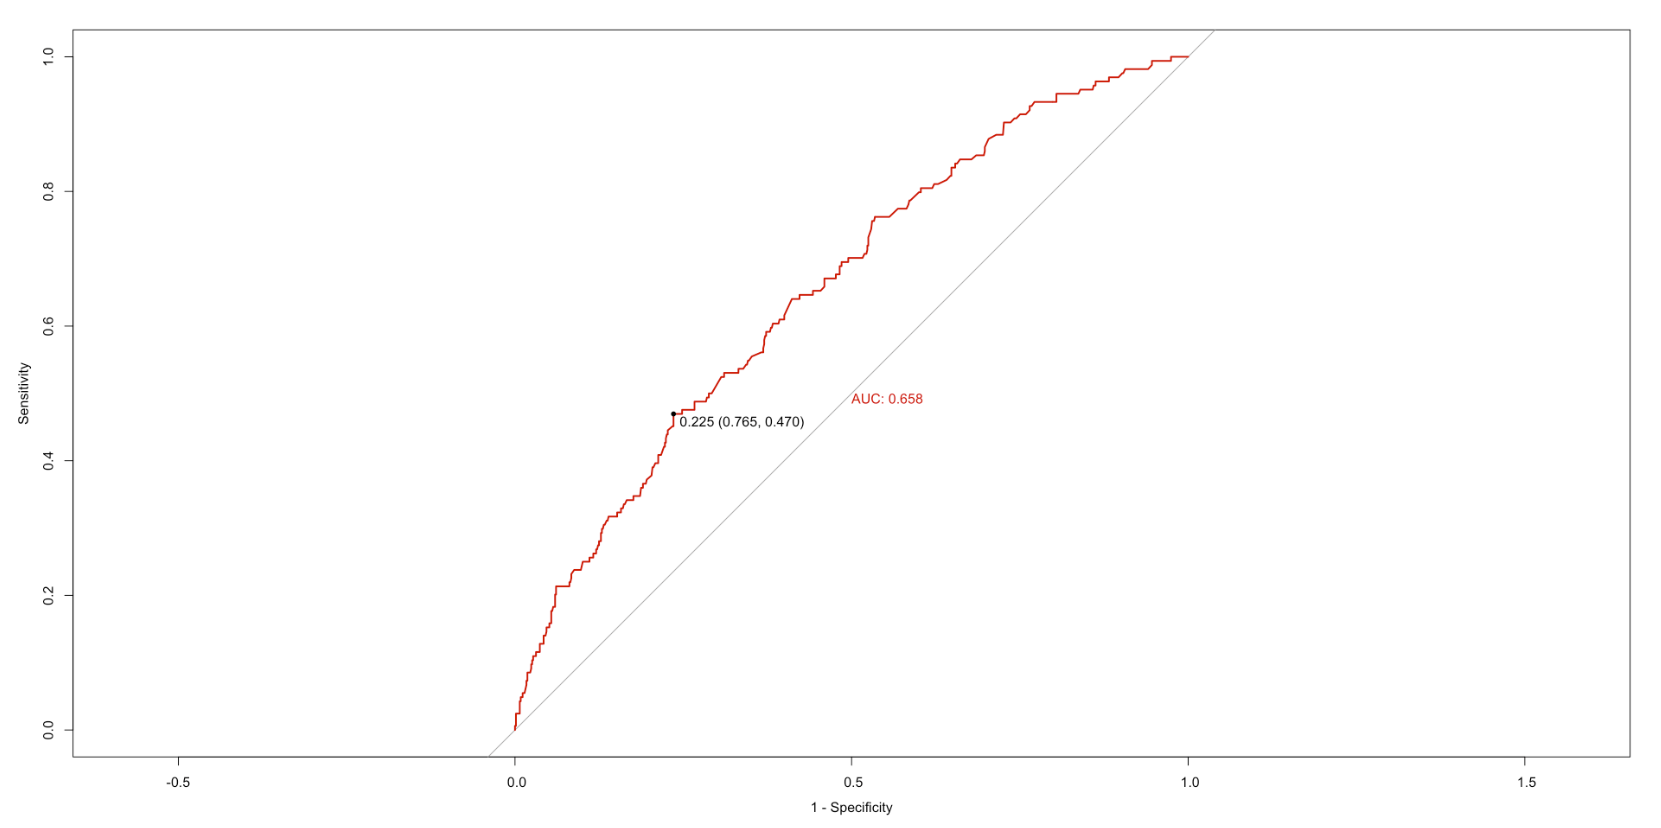

We plotted ROC curve to visualize the accuracy of our data. We optimized for the best threshold and we had a threshold probability of 0.22, which raised the sensitivity of the  baseline model from 0.02 to 0.47 and decreased specificity from 0.99 to 0.77. Also, optimizing our model with a threshold of 0.22 reduced our accuracy from 0.81 to 0.71. And the AUC was 0.66. Since we did not observe any pattern in the binned residual plots, we could not justify carrying out transformation of our predictor variables to improve model performance. 

Instead, we sought to improve the performance of our model in making predictions by selecting our predictor models from our data set with AIC. Since it is a scientific method of model selection, we explored it as an option which would generate an optimized model that would achieve the better performance given the limitations inherent in our data.

## Model Selection

We ultimately carried out step wise model selection with AIC because when we iterated with BIC, it selected a model with mother's height as the only predictor variable without controlling for effects. In order to have answers for the inferential questions, we used step wise model selection with AIC which generated the following model. It worthy to note that interaction between mothers pre-pregnancy weight and the smoking habits of mothers was dropped by the stepwise model selection process.

In [59]:
n <- nrow(babies)
null_model <- glm(gestation ~ 1, family=binomial(link=logit), data=babies)
full_model <- glm(gestation ~ mpregwt_c + mage_c + mht_c + smoke + mrace + med + parity + inc + mpregwt_c:smoke + mpregwt_c:mrace + mpregwt_c:med + mht_c*(smoke + mrace + med + parity + inc), family=binomial(link=logit), data=babies)
stepwise <- step(glm(gestation~1, data=babies, family=binomial), scope=formula(full_model),direction="both", trace=0)
step_model <- glm(gestation ~ mpregwt_c + mrace + med + smoke, family=binomial(link=logit), data=babies)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


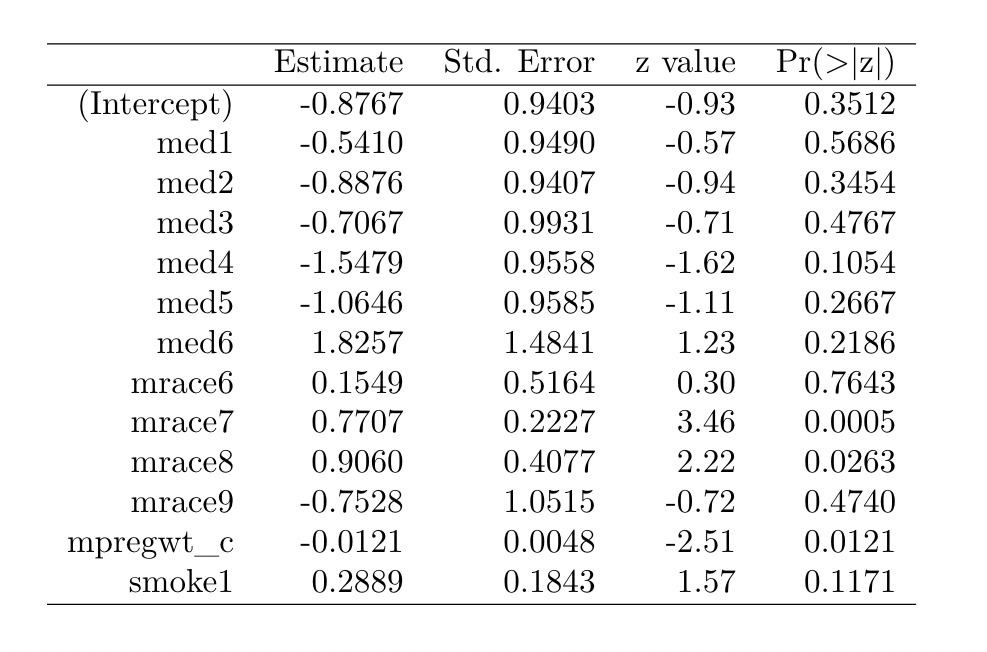

There was no randomness in the points of the average residuals and predicted probabilities plot, and all but one observation were located in the 95% confidence interval. The same can be said for the plot of average residuals against mother pre-pregnancy weight.

rawresid2 <- residuals(step_model,"resp")\
binnedplot(x=fitted(step_model), y=rawresid2, xlab="Pred. probabilities", col.int = "red4", ylab="Avg. residuals", main="Binned Residual Plot of Stepwise Model", col.pts="navy")

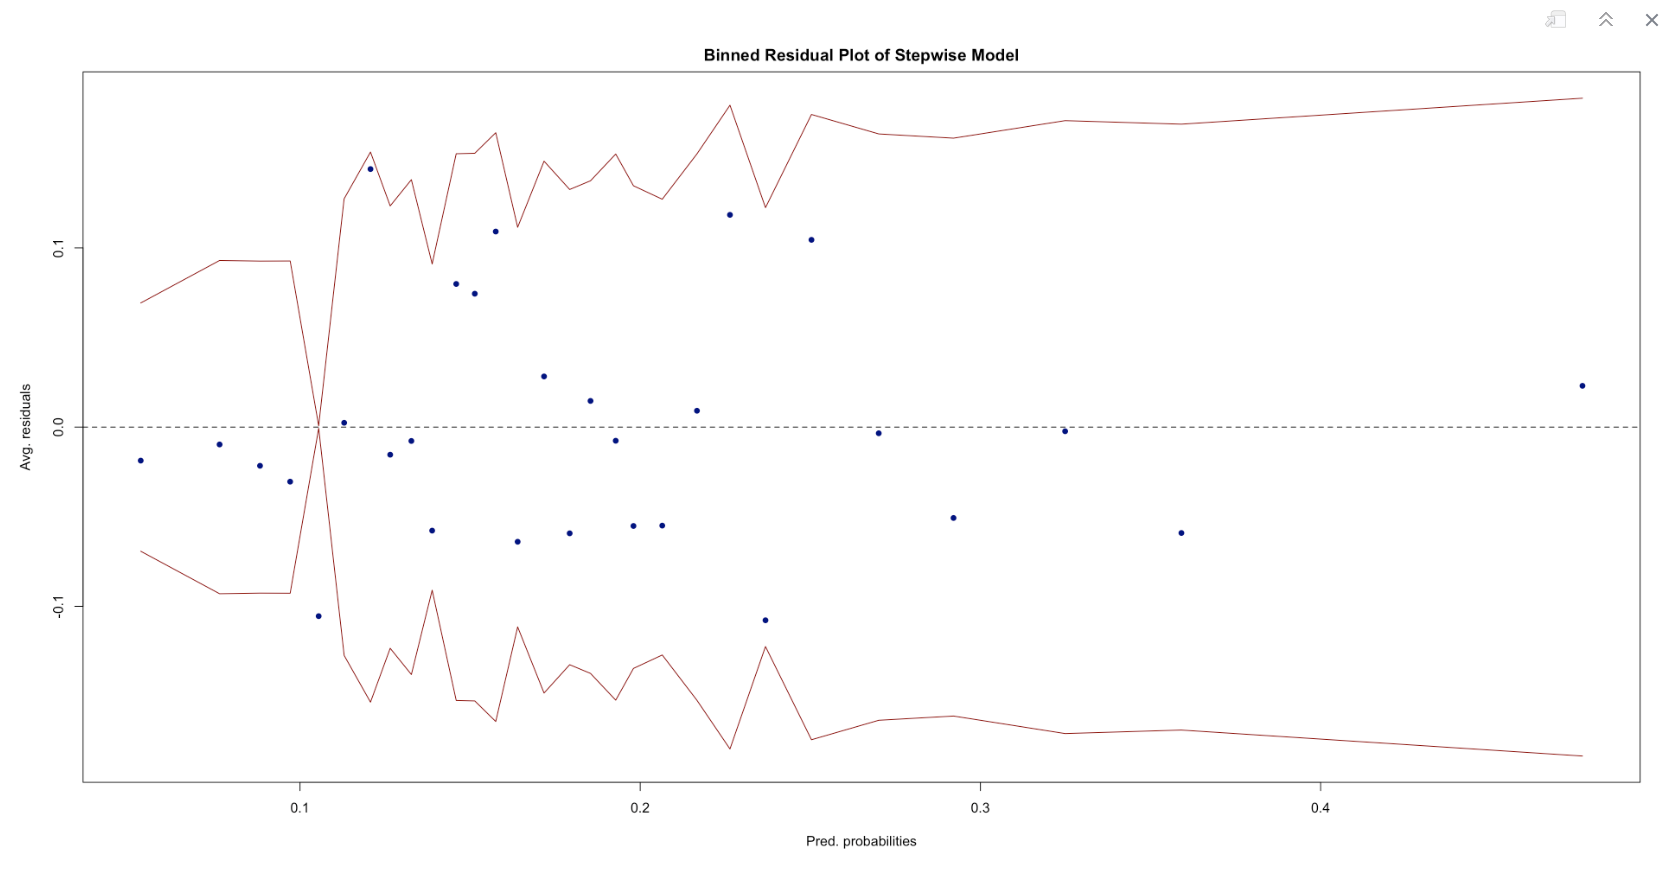

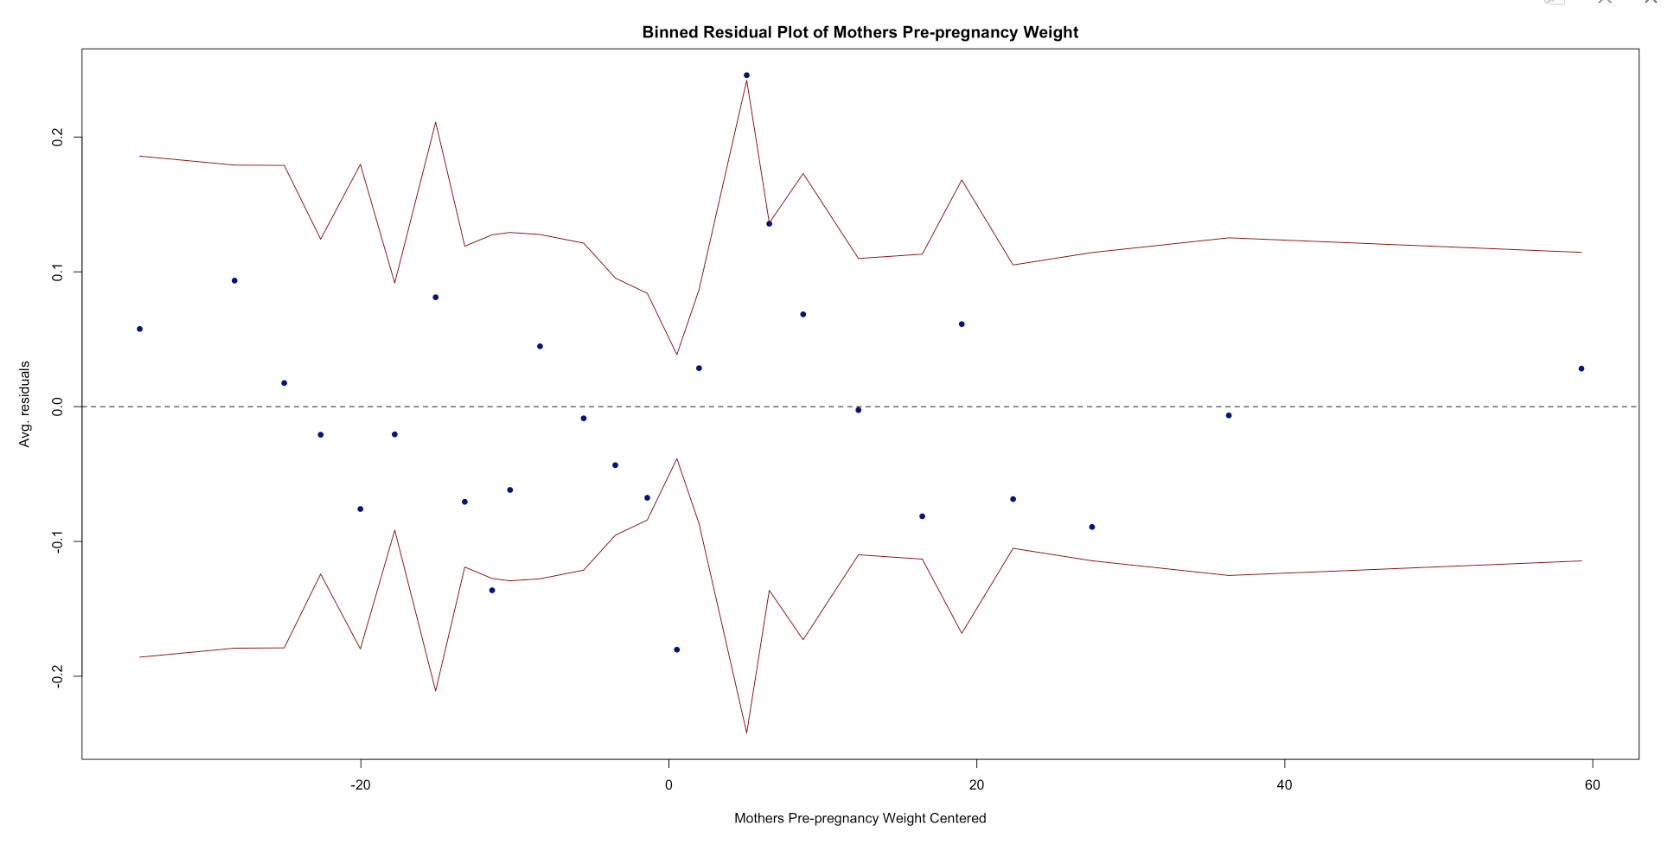

### Model Validation (Final Model)

We validated our baseline model initially with a threshold probability of 0.5. We plotted ROC curve to visualize the accuracy of our data. We optimized for the best threshold and we had a threshold probability of 0.22, which raised the sensitivity of the  baseline model from 0.02 to 0.47 and decreased specificity from 0.99 to 0.76. And the AUC was 0.657.

*conf_mat1 <- confusionMatrix(as.factor(ifelse(fitted(step_model) > 0.5, "1","0")), as.factor(babies$gestation),positive="1")*

*conf_mat1$table*

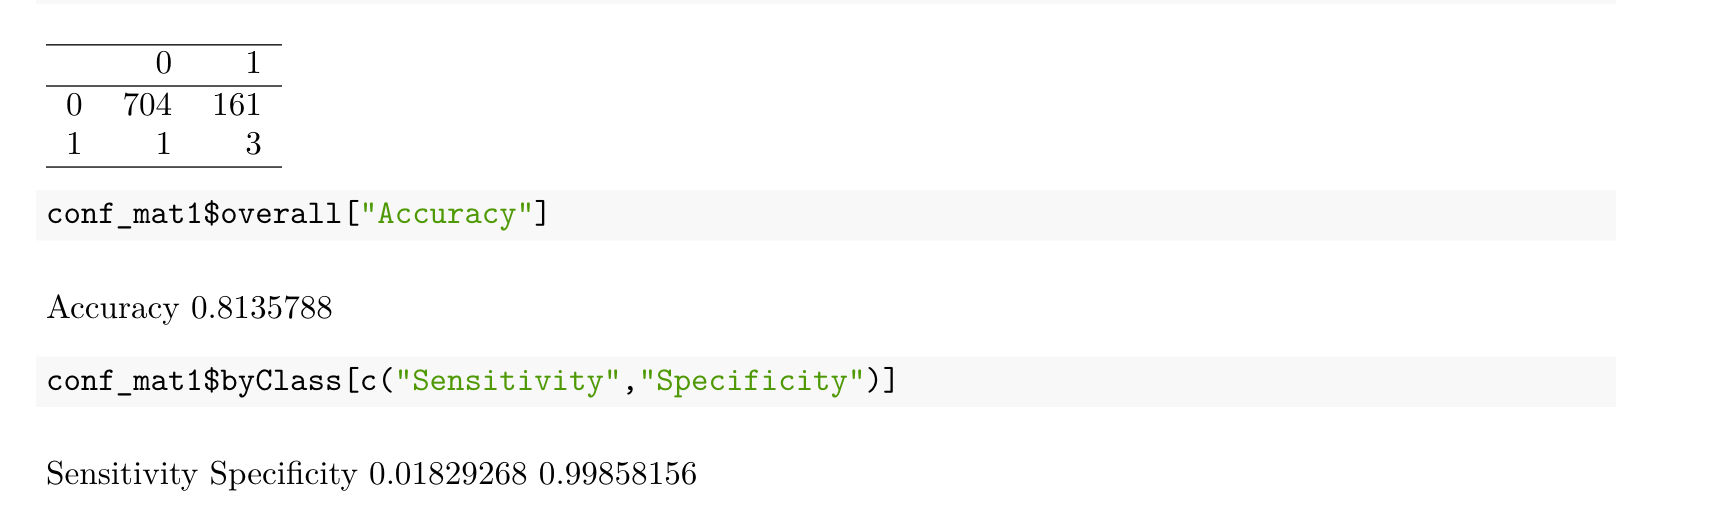

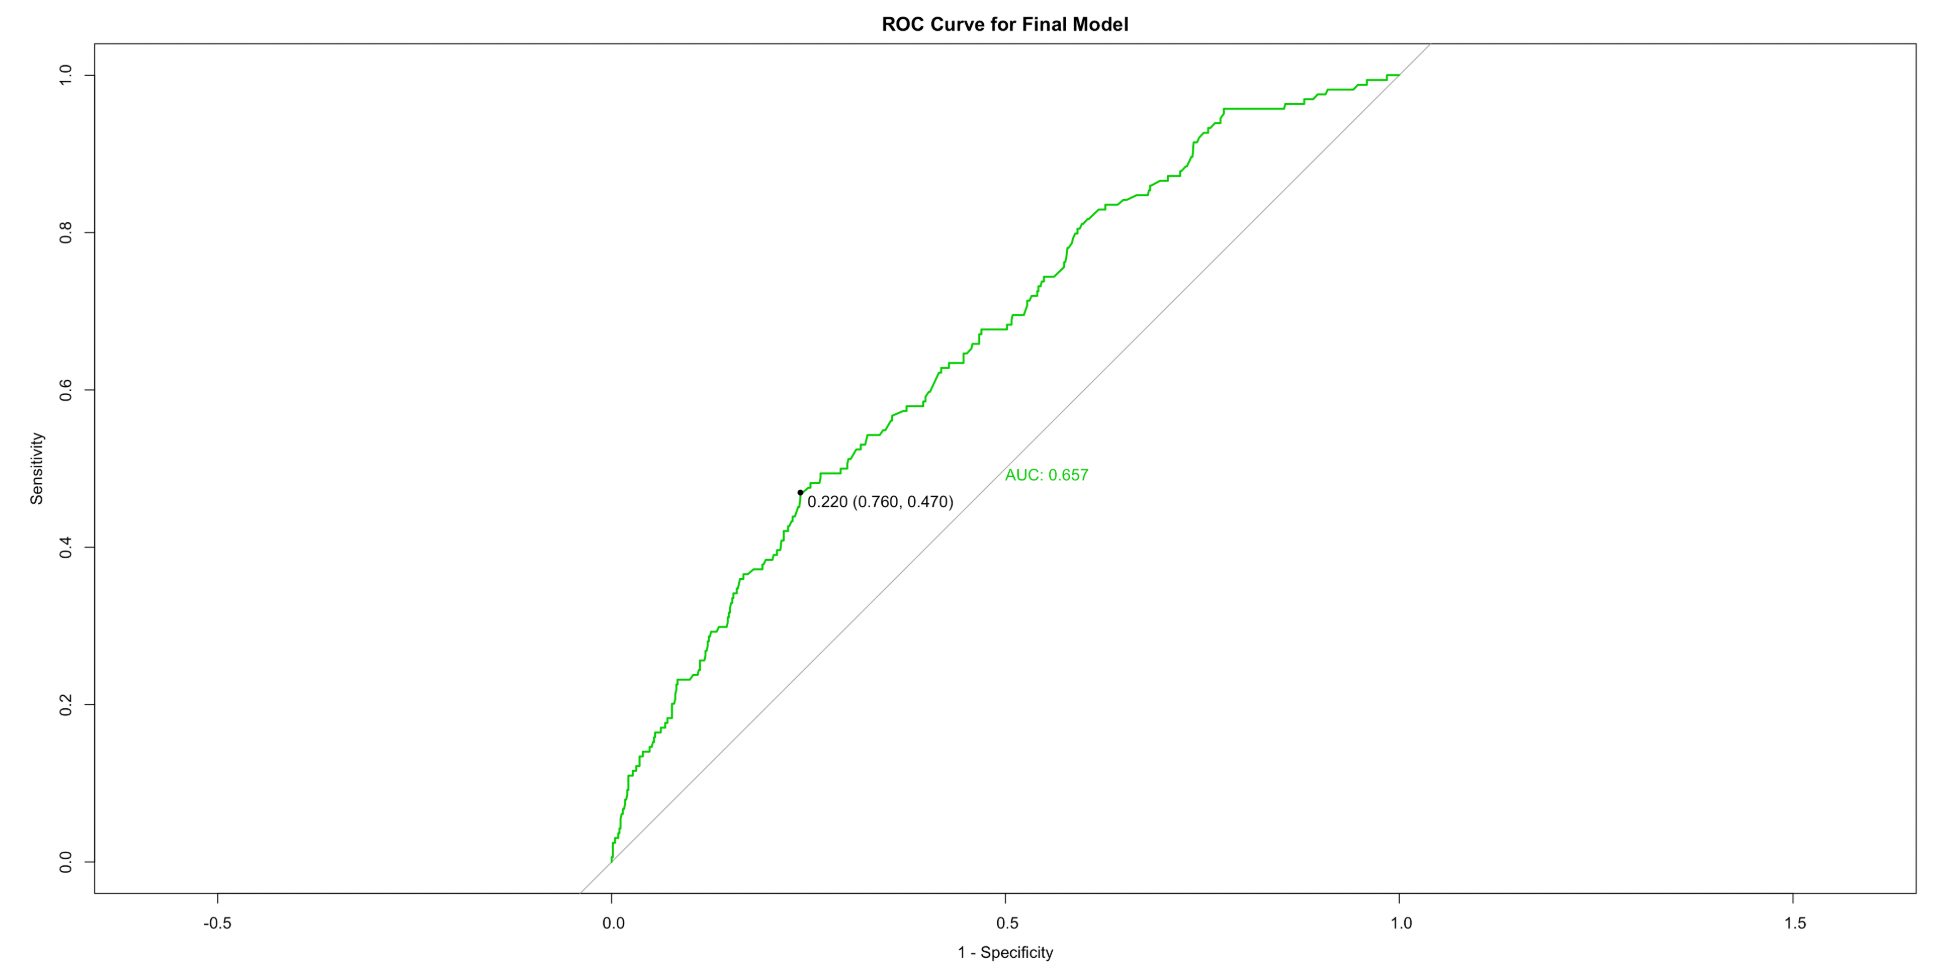

Before selecting our final model, it is important to note that since our model had only one continuous predictor variable, which is the mothers pre-pregnancy weight, it was not possible to check for multicollinearity. Also, mothers pre-pregnancy values had been centered before carrying out EDA as preemptive measure against multicollinearity.

The final model could be expressed mathematically as: $$y_{i}|x_{i} ~ Bernoulli(\pi_{i}); log(\frac{\pi_{i}}{1-\pi_{i}}) = \beta _{0} + \beta _{1}x_{i1}(mpregwt)+ \beta _{2j}x_{i2}(mrace)+ \beta _{3j}x_{i3}(med)+ \beta _{4j}x_{i4}(smoke)$$
where $\pi_{i}$ is the odds of giving birth to a premature baby


The only selected predictor variable which had a statistical significance on the odds of a mother giving birth to premature babies is the pre-pregnancy weight of mothers. The change in deviance was 45.92. 

## Findings

From the the summary of our model below we were able to answer the questions of interest.

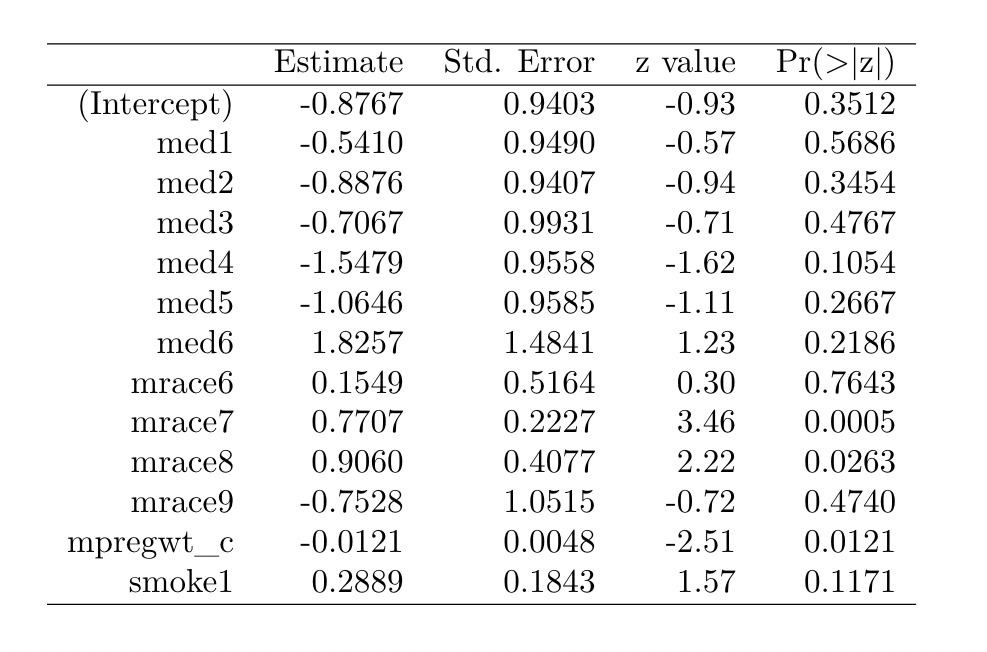

We inferred from our final model that, for mothers who had the same pre-pregnancy weight, had less than 8th grade education and belonged to the white race, the odds of giving birth to premature babies is 34% higher for mothers who smoke compared to mothers who do not smoke.

After computing"two-sided" confidence intervals for our "smoke" predictor variable. Accounting for all other predictors, we are 95% confident that the odds ratio of pre-term births for mothers who smoke lies between 7% less and 92% more than the odds ratio for mothers who do not smoke. 

*ci <- confint(final_model)*

*xtable(ci)*

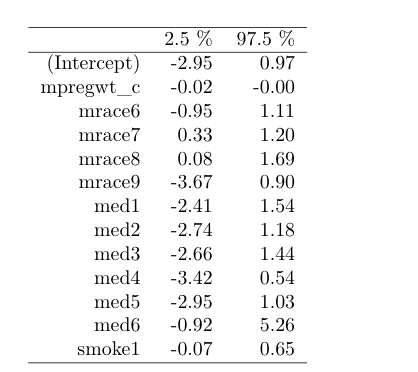

After carrying out a Chi-squared test between our final model and a copy of the final model with the interaction between smoking habits of mothers and mother's race included, we had a p-value of 0.269. This means that the model with interaction between mother's smoking habits and mothers race is not significantly different from our final model, statistically. Thus, there is no statistically significant evidence that the odds ratio of pre-term births for smokers and non-smokers differ by mother's race.

*interaction_model <- glm(gestation ~ mpregwt_c + mrace + med + smoke + smoke:mrace, family=binomial(link=logit), data=babies)*

*anova_table <- anova(final_model, interaction_model, test="Chisq")*

*xtable(anova_table)*

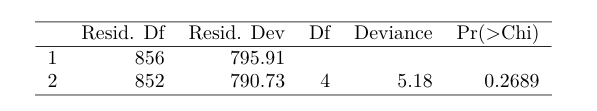

It is important to note that the only continuous predictor variable that had a significant effect on the odds of giving birth to premature babies was mother's pre-pregnancy weight. From our model, keeping all other variables constant, for every one (1) pound increase in mothers pre-pregnancy weight, the odds of giving birth to a premature baby decreases by 1% for mothers who had less than 8th grade education and were white. Another interesting association observed is that the odds of black and Asian mothers giving birth to premature babies is significantly higher compared to the the odds of white mothers giving birth to premature babies, statistically.

### Limitations

Since we used the data set that had already been cleaned up, it was not possible to include father's socioeconomic and biometric data. Since babies bio data is partly inherited from the father, by using this data set, we miss out on other predictors that could explain the odds of mothers giving birth to premature babies.

Despite several iterations to generate an optimized model, our final model had an accuracy of 0.71, a sensitivity of 0.47 and specificity of 0.76. Our model with thus be correct, less than half of the time in predicting whether a child will be born prematurely. This limitation can be attributed to the lack of strong associative relationship between our response variable and all the possible predictor variables in the data. Our AUC was also 0.657 which is far cry from desired value within the close neighborhood of 1.

With a p-value of 0.12, maternal smoking behavior did not have a significant effect on the odds of giving birth to a premature baby. This means that even though we are obliged to include it in our model to interpret its effect on the chances of mothers giving birth to preterm babies, in reality, according to the data, it has no significant bearing on the odds of a mother giving birth to a premature baby. Also, the "smoking.csv" data did not have enough observations for reliable accuracy in Chi-squared approximation so it was difficult to accurately determine if the predictor variables were dependent on the response variable.

